In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idx_tools import Idx
from plot_data import Results
import tensorflow as tf
from tensorflow import keras
import os

%matplotlib inline

C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Carsten\Anaconda3\envs\openCV3\lib\site-packages\ten

In [14]:
# Read the data 
filename = './dataset/train-images.idx3-ubyte'
train_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/train-labels.idx3-ubyte'
train_labels = Idx.load_labels(filename)

# Read the data 
filename = './dataset/test-images.idx3-ubyte'
test_images = Idx.load_idx(filename)

# Read the labels
filename = './dataset/test-labels.idx3-ubyte'
test_labels = Idx.load_labels(filename)

# Read the letter names for each label
filename = './dataset/labels.txt'

file = open(filename,"r") 
class_names =  [str.split(x) for x in file.readlines()]

Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)
Magic number: (0, 0, 8, 3)
Magic number: (0, 0, 8, 1)


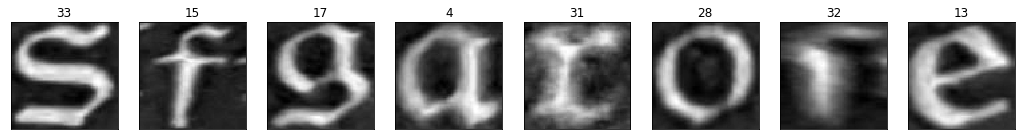

In [15]:
# Plot some random examples
n_images = train_images.shape[0]
n_plots = 8

fig, ax = plt.subplots(1, n_plots, figsize=(18, 18))
for i in range(n_plots):
    image_num = np.random.randint(low=0, high=n_images)
    ax[i].imshow(train_images[image_num], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(train_labels[image_num])

Modified from: https://www.tensorflow.org/tutorials/keras/basic_classification

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

n_categories = len(class_names)

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(80, 80)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(n_categories, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels, epochs=20)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/20
11912/11912 [==============================] - 3s 239us/sample - loss: 0.8177 - acc: 0.8249
Epoch 2/20
11912/11912 [==============================] - 3s 236us/sample - loss: 0.2267 - acc: 0.9459
Epoch 3/20
11912/11912 [==============================] - 3s 236us/sample - loss: 0.1713 - acc: 0.9563
Epoch 4/20
11912/11912 [==============================] - 3s 234us/sample - loss: 0.1688 - acc: 0.9561
Epoch 5/20
11912/11912 [==============================] - 3s 233us/sample - loss: 0.1305 - acc: 0.9644
Epoch 6/20
11912/11912 [==============================] - 3s 232us/sample - loss: 0.1151 - acc: 0.9704
Epoch 7/20
11912/11912 [==============================] - 3s 235us/sample - loss: 0.0963 - acc: 0.9741
Epoch 8/20
11912/11912 [==============================] - 3s 235us/sample - loss: 0.0911 - acc: 0.9762
Epoch 9/20
11912/11912 [==============================] - 3s 233us/sample - loss: 0.1074 - acc: 0.9708
Epoch 10/20
11912/11912 [==============================] - 3s 233us/sampl

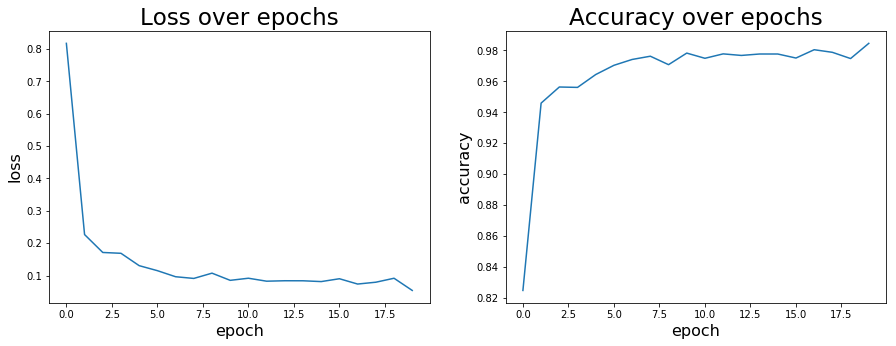

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss over epochs', fontsize=23)
ax[0].set_xlabel('epoch', fontsize=16)
ax[0].set_ylabel('loss', fontsize=16)

ax[1].plot(history.history['acc'])
ax[1].set_title('Accuracy over epochs', fontsize=23)
ax[1].set_xlabel('epoch', fontsize=16)
ax[1].set_ylabel('accuracy', fontsize=16)

plt.show()

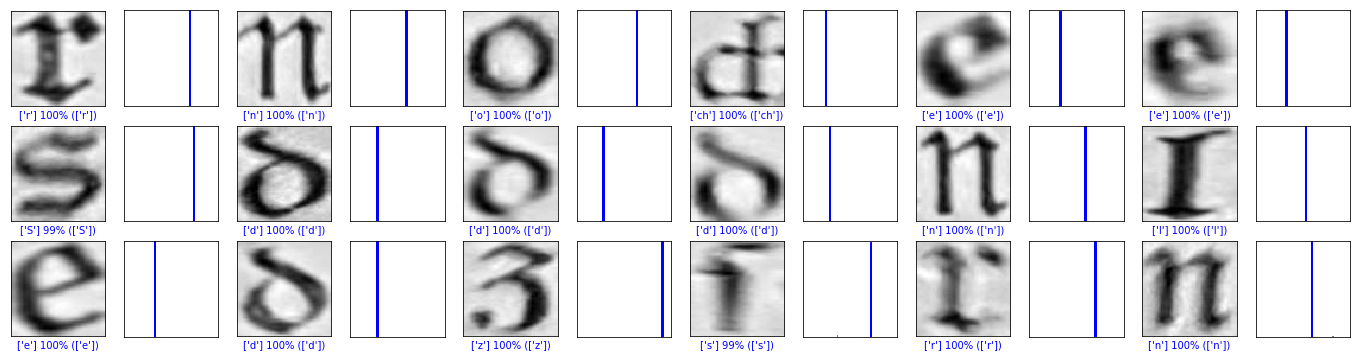

In [20]:
predictions = model.predict(test_images)

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 3
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    rand_image = np.random.randint(low=0, high=test_images.shape[0])
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    Results.plot_image(rand_image, predictions, test_labels, test_images, class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    Results.plot_value_array(rand_image, predictions, test_labels, n_categories)
plt.show()

In [12]:
# Save the model
if not os.path.isdir('./model'):
    os.mkdir('./model')

# Save the model structure to JSON file
model_json = model.to_json()
with open("./model/model.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5 file
model.save_weights("./model/model.h5")
print("Model saved")

Model saved
